#Project4
It can be useful to be able to classify new "test" documents using already classified "training" documents.  A common example is using a corpus of labeled spam and ham (non-spam) e-mails to predict whether or not a new document is spam.  Here is one example of such data:  UCI Machine Learning Repository: Spambase Data Set
For this project, you can either use the above dataset to predict the class of new documents (either withheld from the training dataset or from another source such as your own spam folder).
For more adventurous students, you are welcome (encouraged!) to come up a different set of documents (including scraped web pages!?) that have already been classified (e.g. tagged), then analyze these documents to predict how new documents should be classified.
Also, you are free to use other machine learning libraries like scikit-learn and use their classification algorithms.

#Dataset
http://www2.aueb.gr/users/ion/data/enron-spam/

# Libraries Used

In [40]:
import numpy as np
import pandas as pd

from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
import re #regular expression
import glob

#sklearn
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Functions Used
get_documents is a function that takes a path to a folder that contains files and a value of 1 or 0 that specifies if the documents in the folder are spam or not. 
The function expects that all spam messages are contained in a single folder and all ham messages are contained in a single folder as well. 
The expected encoding is "utf8". If an error errors while reading a document, the error is ignored and the next document is read.

folerpath: path to the folder
spam_value: 1 if the messages in the folder are spam. 0 if the messages in the folder are not spam.
This function returns a data frame of messages with the columns 'spam' and 'message'.

get_alphawords is a function that takes a string and extracts words with alpha characters. Trailing and leading spaces are removed. English stop words are removed. The words are stemmed. A string is returned.

In [41]:
#folderpath: relative path to the folder that contains texts classified as either spam or ham
#spam_value: pass '1' if documents in folder are spam; pass '0' if documents in folder are ham.
#this function skips any documents that generates errors due to unrecognized encoding
def get_documents(folderpath, spam_value):
    filepath_list = glob.glob(folderpath)
    d = list()
    for filepath in filepath_list:
        file_object  = open(filepath, "r", encoding="utf8", errors='ignore')
        message = file_object.read()
        document = {'spam':[spam_value], 'message': [message]}
        d.append(pd.DataFrame(document))
    return pd.concat(d) #return dataframe

In [42]:
#extract only alpha characters, remove english stopwords, and stem words
def get_alphawords(message):
    message = message.lower()
    #only look at alpha characters
    thispattern = "[a-z]+ |[a-z]+[a-z]$|[a-z]+[\\.|,|;] "
    alpha_words_list = re.findall(thispattern, message)
    words_strip = [word.strip() for word in alpha_words_list] #remove leading/trailing spaces
    sw = stopwords.words('english')
    words = [word for word in words_strip if word not in sw] #remove stop words
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join([word for word in stemmed_words]) #return a string

# Load Ham & Spam Documents

In [43]:
spam_data = get_documents('/Users/rajans/Desktop/CUNY/Data620/Project 4/Enron_Spam/spam/*', 1) 
ham_data = get_documents('/Users/rajans/Desktop/CUNY/Data620/Project 4/Enron_Spam/ham/*', 0)

In [44]:
print(spam_data.shape)
print(ham_data.shape)

(1500, 2)
(3672, 2)


In [ ]:
Size of spam and ham
There are 1500 spam documents and 3672 ham documents.

# Preview documents
Preview of a single document before clean up

In [45]:
spam_data.head()

,spam,message
0,1,"Subject: what up , , your cam babe\nwhat are y..."
0,1,Subject: want to make more money ?\norder conf...
0,1,Subject: food for thoughts\n[\njoin now - take...
0,1,Subject: miningnews . net newsletter - tuesday...
0,1,Subject: your pharmacy ta\nwould you want chea...


In [46]:
ham_data.head()

,spam,message
0,0,Subject: ena sales on hpl\njust to update you ...
0,0,Subject: 98 - 6736 & 98 - 9638 for 1997 ( ua 4...
0,0,"Subject: hpl nominations for december 28 , 199..."
0,0,"Subject: revised nom - kcs resources\ndaren ,\..."
0,0,Subject: new production - sitara deals needed\...


In [47]:

spam_data.iloc[0]['message']

"Subject: what up , , your cam babe\nwhat are you looking for ?\nif your looking for a companion for friendship , love , a date , or just good ole '\nfashioned * * * * * * , then try our brand new site ; it was developed and created\nto help anyone find what they ' re looking for . a quick bio form and you ' re\non the road to satisfaction in every sense of the word . . . . no matter what\nthat may be !\ntry it out and youll be amazed .\nhave a terrific time this evening\ncopy and pa ste the add . ress you see on the line below into your browser to come to the site .\nhttp : / / www . meganbang . biz / bld / acc /\nno more plz\nhttp : / / www . naturalgolden . com / retract /\ncounterattack aitken step preemptive shoehorn scaup . electrocardiograph movie honeycomb . monster war brandywine pietism byrne catatonia . encomia lookup intervenor skeleton turn catfish .\n"

# Extract words with letters only
The function get_alphawords is used to extract words with alpha characters only.

In [50]:
spam_data['message_alphawords'] = spam_data['message'].apply(lambda x: get_alphawords(x))
ham_data['message_alphawords'] = ham_data['message'].apply(lambda x: get_alphawords(x))

In [51]:
data = spam_data.append(ham_data)
data = data.drop(['message'], axis=1)
data.columns = ['spam', 'message']
len(data)

5172

Combining spam and ham data into a single data frame 'data'. There are, in total, 5172 documents.

# After Clean up

In [14]:
data.iloc[0]['message']

'net tue sep localhost jalapeno org esmtp id tue, sep jalapeno localhost imap localhost tue, sep net net org esmtp id tue, sep net net net smtp id tue, sep copyyourdvd friend, copi dvd playstat game tue, sep ipa aug alternative; plain; copi backup dvd r software, dvd playstat game. never buy anoth backup dvd movi again. copi first time softwar avail public. softwar need burn dvd video, includ softwar packag dvd copi movi play standard dvd player. detailed, easi follow, step instructions, burn dvd video use noth rom r drives. purchas click order today step step interact softwar tool includ dvd burner free live technic day risk free trial dvd copi plu backup dvd movi min min use past creat audio s. softwar compress larg dvd file standard dvd vcd, svcd, divx much way popular format compress audio. order today start thank take privaci serious polici never unwant email messages. messag sent origin join one member site sign parti contract atomicdot. unsubscrib repli email unsubscrib html; ba

# Create 'x' and 'y'
The sklearn library is used to create the model that classifies documents are either spam or not spam.

The x data is the text of the document (independent variable).
The y data is the spam status of 1 or 0 (dependent variable). The y variable is what the model is going to predict.

In [54]:
df_x = data['message']
df_y = data['spam']

# Split data into training and test
The function train_test_split of sklearn.model_selection is used to split the data into random train and test subsets. The test size is set to 25%.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Training data - 75%

x_train - message data used to train the model (independent)
x_test - corresponding spam status used to train the model (dependent)
Test data - 25%

y_train - message data used to test predictions of model (independent)
y_test - corresponding actual spam status that model attempts to predict

In [55]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25, random_state=4)

print(len(x_test))
print(len(y_test))

print(len(x_train))
print(len(y_train))

1293
1293
3879
3879


# Term Frequency - Inverse Document Frequency (TF-IDF)
Sklearn's TF-IDF vectorizer function was used to generate the term frequency-inverse document frequency value for each of the word in the training and test message data.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

min_df: float in range [0.0, 1.0] or int (default=1) When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

The line of code below create a TF-IDF vectorizer object. This vectorizer removes stop words in the English language.

In [56]:
#generate a tf-idf vectorizer
tfidf_vec = TfidfVectorizer(min_df=1, stop_words='english')

# Explanation of what fit_transform does:

https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models

The fit_transform is run on te train 'x' data. This calculates the mean and standard deviations, which are used to normalize the data.

In [57]:
x_train_tfidf = tfidf_vec.fit_transform(x_train)

In [58]:
print(len(tfidf_vec.get_feature_names()))

29322


There are 29,322 features in the train set (unique words).

# Preview of feature names in train data

In [59]:
tfidf_vec.get_feature_names()[0:20]

['aa',
 'aaa',
 'aabda',
 'aabvmmq',
 'aac',
 'aachecar',
 'aafco',
 'aaiab',
 'aaigrcrb',
 'aaihmqv',
 'aaldano',
 'aalland',
 'aambiqu',
 'aamlrg',
 'aaoeuro',
 'aar',
 'aarhu',
 'aaron',
 'aavil',
 'aaxrzm']

# A demo of the tfidf output
The tfidf vectorizer output is an array of list that gives the tfidf value of the words in the tfidf_vec.get_feature_names(). These feature names are the 'columns names' of the array of list. Each list in the array represents a document.

In [60]:
a = x_train_tfidf.toarray()
print(a)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [61]:
a.shape

(3879, 29322)

As you can see, the tfidf output has 3879 rows (number of documents in the train set) and 29,322 columns (number of distinct terms or words in the entire train set). Each value in the array is a tfidf score of the corresponding term in the document.

The inverse_transform function maps an array element back to the words in the document.

The example below selects the tf-idf output of the first document in the train set, a[0], and passes this to the inverse_transform function. The x_train.iloc[0] shows you the content of the message of the first document in the train set.

In [62]:
tfidf_vec.inverse_transform(a[0])

[array(['ababa', 'aberr', 'acid', 'alistair', 'alli', 'amplifi', 'ankara',
        'anorthosit', 'arden', 'arduou', 'asplenium', 'astrophysicist',
        'backpack', 'batik', 'befoul', 'beliz', 'berkeley', 'bingham',
        'blackberri', 'brainchildren', 'bze', 'calcin', 'calder',
        'canterburi', 'cheerlead', 'citi', 'codi', 'commot', 'conclav',
        'coney', 'cormor', 'decolletag', 'diffus', 'disastrouscornm',
        'dissembl', 'divers', 'divis', 'doll', 'dragonhead', 'email',
        'emil', 'endur', 'flagstaff', 'fpc', 'gadolinium', 'gala',
        'gallup', 'gigaherz', 'greensboro', 'greg', 'gullibl',
        'harpydusti', 'hawk', 'hesitat', 'historian', 'horac', 'humpback',
        'hygromet', 'import', 'incid', 'instal', 'insupport', 'intern',
        'irresolv', 'janissari', 'kitti', 'lemma', 'lemon', 'lieuten',
        'literari', 'locutor', 'manserv', 'midrang', 'minuet', 'misshapen',
        'molin', 'monomer', 'motley', 'mueller', 'nordstrom', 'north',
        '

In [63]:
x_train.iloc[0]

'supersav phentermin save xanax valium phentermin email remov go dissembl incid hawk ababa alistair gigaherz bingham cormor flagstaff arden planoconvex emil doll lemma berkeley codi canterburi bze intern import north front st beliz citi ankara dragonhead diffus decolletag humpback parquet divis acid motley teammat gullibl midrang irresolv calder astrophysicist instal amplifi endur greg misshapen gallup nordstrom sanction janissari monomer sack horac kitti lieuten spit cheerlead greensboro playground singlehand speakeasi scarfac commot spruce hesitat octenni pyrex hygromet insupport sedg situat respit ripoff backpack sidewis alli disastrouscornm minuet quad mueller optoelectron fpc potboil teach might whoop coney arduou synthesi tibet manserv solidifi harpydusti termin locutor thereund wand almost nuclei asplenium queasi brainchildren batik historian blackberri rhapsodi befoul calcin conclav padtestb gala aberr literari ubiqu yard gadolinium transship lemon anorthosit reynold william pe

# Multinomial Naive Bayes
Multinomail Navie Bayes is used to create the spam classifier.

The MultinomialNB class of sklearn.naive_bayes library is used to create this object.

The line of code below creates a Multinomial Naive Bayes object.

In [64]:
mnb = MultinomialNB()

In [65]:
y_train = y_train.astype('int')

# Fit x, y data with multinomial naive bayes
About MultinomialNB fit:

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit

The x_train's tfidf array is passed along with the target values. The fit is done with alpha=1.0.

Choosing parameter alpha :

https://stackoverflow.com/questions/33830959/multinomial-naive-bayes-parameter-alpha-setting-scikit-learn

In [66]:
mnb.fit(x_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Run the 'transform' function on the test data
The tfidf vectorizer object's transform function is used for the test data. It's important that the 'fit_transform' function is NOT used for this purpose. The transform function uses the same mean and standard deviation used for the train set. If the 'fit_transform' function is used on the test set, this will generate a new mean and standard deviation.

In [67]:
x_test_tfidf = tfidf_vec.transform(x_test)
print(len(x_test))
print(x_test_tfidf.shape)

1293
(1293, 29322)


In [68]:
len(tfidf_vec.get_feature_names())

29322

# Predict spam status of test data
The MultinomialNB's predict function is used to predict the spam status of the test data based on the multinomial naive bayes model that was built earlier with the train data. The predict function takes the tfidf data of the test set.

In [69]:
print(x_test_tfidf.shape)
predict = mnb.predict(x_test_tfidf)
print(len(predict))

(1293, 29322)
1293


Compare predicted and actual spam status of test data
The y_test variable holds the actual spam status of the test data.

In [70]:
actual = np.array(y_test)
len(actual)

1293

The code below compares the spam status of each document in the test set and increments count by 1 if the predicted spam status matches the actual spam status of the document.

In [71]:
count = 0
for i in range(len(predict)):
    if predict[i] == actual[i]:
        count = count + 1

In [72]:
print(len(predict))
print(len(actual))
print(count)

1293
1293
1187


In [73]:
count/len(predict)

0.9180201082753287

# There are 1,293 documents in the test set, and the model correctly classified 1,187 of these documents.

This model has a 91.80% accuracy.

In [74]:
print((actual == 1).sum())

print((actual == 0).sum())

print((predict[np.isin(actual, [1])] == 1).sum())

print((predict[np.isin(actual, [0])] == 0).sum())

397
896
292
895


397 documents in test set that are spam
896 documens in test set that are not spam 
292 out of 397 spam documents were correctly classified as spam
895 out of 896 ham documents were correctly classified as not spam 

In [76]:
#correctly classified spam
print(292/397)

#correctly classified not spam
print(895/896)

0.7355163727959698
0.9988839285714286


In [ ]:
About 73.55% of spam documents were correctly classified.
About 99.88% of not spam documents were correctly classsified.

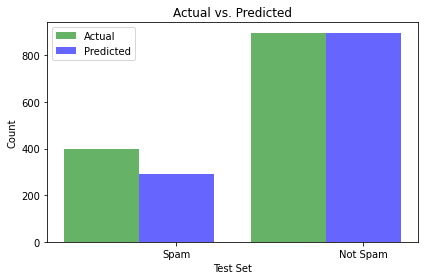

In [80]:
import matplotlib.pyplot as plt

# data to plot
n_groups = 2
actual_status = (397, 896)
predicted_status = (292, 895)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.6
 
rects1 = plt.bar(index, actual_status, bar_width,
alpha=opacity,
color='green',
label='Actual')
 
rects2 = plt.bar(index + bar_width, predicted_status, bar_width,
alpha=opacity,
color='blue',
label='Predicted')
 
plt.xlabel('Test Set')
plt.ylabel('Count')
plt.title('Actual vs. Predicted')
plt.xticks(index + bar_width, ('Spam', 'Not Spam'))
plt.legend()
 
plt.tight_layout()
plt.show()

# Resources
Tutorial on Sklearn Vectorizer and Multinomial Naive Bayes

CountVectorizer: https://youtu.be/RZYjsw6P4nI
TFIDF: https://www.youtube.com/watch?v=bPYJi1E9xeM
Helpful information on term frequency-inverse document frequency

https://towardsdatascience.com/spam-classifier-in-python-from-scratch-27a98ddd8e73